# Exploratory Data Analysis - Women's Premier League

Author: Faizanulla Baig

Connect with me @LinkedIn:: linkedin.com/in/faizanullabaig

Published Date: 2025-03-10

Winner of 1st WPL - Mumbai Indianswpl_image

#### Introduction

This dataset contains data on the Women's Premier League, a professional women's cricket league in India.

WPL Data Contains

Auction_data
Match Information
Deliveies
Data Dictionery
Comments - Data process and sources

#### Disclamer: 
I would like to provide a disclaimer that I have limited knowledge of Python and relied extensively on the ChatGPT language model for this project. I conducted an analysis of a dataset using Python and utilized ChatGPT to assist with any challenges or gaps in my understanding of the programming language.

I kindly request you to review the analysis and provide your valuable feedback for any changes, room for improvement, or any other suggestions that you may consider important. Your feedback is crucial in helping me to enhance the quality and accuracy of the analysis.

## Importing the necessary Python libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tabulate
import plotly.graph_objs as go

## Reading the data file into a Pandas DataFrame

In [5]:
auction_df = pd.read_csv('Auction_Data.csv')
match_info_df = pd.read_csv('Match_Info.csv')
deliveries_df = pd.read_csv('Deliveries.csv')

## Getting the shape and size of the DataFrame

In [6]:
print("Auction_data.csv - Rows:", auction_df.shape[0], "Columns:", auction_df.shape[1])
print("Match_Info.csv - Rows:", match_info_df.shape[0], "Columns:", match_info_df.shape[1])
print("Deliveries.csv - Rows:", deliveries_df.shape[0], "Columns:", deliveries_df.shape[1])

Auction_data.csv - Rows: 91 Columns: 7
Match_Info.csv - Rows: 22 Columns: 19
Deliveries.csv - Rows: 4999 Columns: 19


## Viewing the first and last few rows of the DataFrame

In [7]:
print(str(auction_df))
print(str(match_info_df))
print(str(deliveries_df))

             DBNames               Players       Country TNAME  \
0            AC Kerr           Amelia Kerr   New Zealand    MI   
1           S Ismail        Shabnim Ismail  South Africa   UPW   
2         MM Lanning           Meg Lanning     Australia    DC   
3         TM McGrath        Tahila McGrath     Australia   UPW   
4          DP Vaidya         Devika Vaidya         India   UPW   
..               ...                   ...           ...   ...   
86            S Rana             Sneh Rana         India    GG   
87       L Wolvaardt       Laura Wolvaardt  South Africa    GG   
88  K Anjali Sarvani        Anjali Sarvani         India   UPW   
89          KJ Garth             Kim Garth     Australia    GG   
90       SV Yashasri  Soppadhandi Yashasri         India   UPW   

         Team Name  Base Price  Sold For  
0   Mumbai Indians     4000000  10000000  
1      UP Warriorz     4000000  10000000  
2   Delhi Capitals     5000000  11000000  
3      UP Warriorz     4000000  140

## Getting the names of the columns in the DataFrame

In [8]:
print("Auction_data.csv Columns:")
print(list(auction_df.columns))

print("Match_Info.csv Columns:")
print(list(match_info_df.columns))

print("Deliveries.csv Columns:")
print(list(deliveries_df.columns))

Auction_data.csv Columns:
['DBNames', 'Players', 'Country', 'TNAME', 'Team Name', 'Base Price', 'Sold For']
Match_Info.csv Columns:
['Match_ID', 'Team1', 'Team2', 'season', 'date', 'match_number', 'Stadium', 'city', 'toss_winner', 'toss_decision', 'player_of_match', 'umpire', 'umpire.1', 'reserve_umpire', 'tv_umpire', 'match_referee', 'winner', 'winner_runs', 'winner_wickets']
Deliveries.csv Columns:
['match_id', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type', 'other_player_dismissed']


## Calculating the total runs, fours, sixes, and wickets scored in the entire WPL

In [11]:
##Calculate the total runs
total_runs = deliveries_df['runs_off_bat'].sum() + deliveries_df['extras'].sum()

# Calculate the total fours
total_fours = deliveries_df[deliveries_df['runs_off_bat'] == 4]['runs_off_bat'].count()

# Calculate the total sixes
total_sixes = deliveries_df[deliveries_df['runs_off_bat'] == 6]['runs_off_bat'].count()

# Calculate the total wickets
filtered_wicket_data = deliveries_df[(deliveries_df['wicket_type'].isin(['bowled', 'caught', 'lbw', 'caught and bowled', 'stumped', 'run out']))
                                & (deliveries_df['wicket_type'].notnull())
                                & (deliveries_df['wicket_type'] != 'retired hurt')]
                                
wickets_data = filtered_wicket_data.groupby('bowler')['wicket_type'].count()
total_wickets = wickets_data.sum()


# Print the results
print(f"Total runs scored: {total_runs}")
print(f"Total fours: {total_fours}")
print(f"Total sixes: {total_sixes}")
print(f"Total wickets: {total_wickets}")

Total runs scored: 6541
Total fours: 801
Total sixes: 159
Total wickets: 258


## Creating a bar chart of the number of matches won by each team

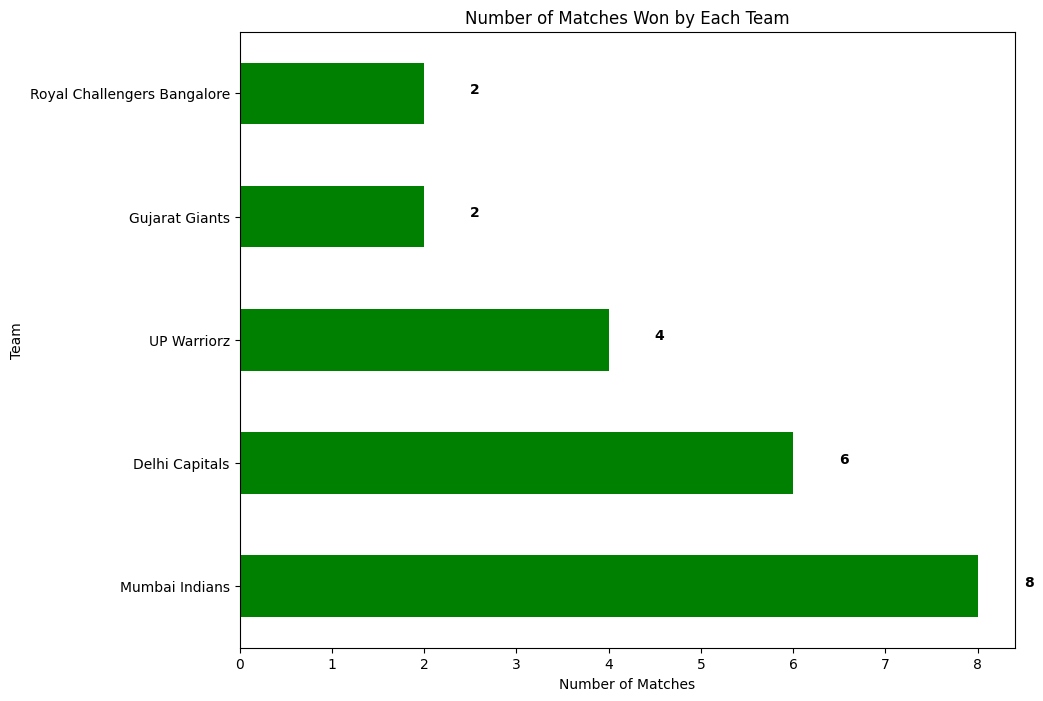

In [13]:
matches_won = match_info_df['winner'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))
ax = matches_won.plot.barh(color='green')
ax.set_title('Number of Matches Won by Each Team')
ax.set_xlabel('Number of Matches')
ax.set_ylabel('Team')

for i, v in enumerate(matches_won):
    ax.text(v + 0.5, i, str(v), color='black', fontweight='bold')
plt.show()

## Creating a bar chart of the number of matches lost by each team

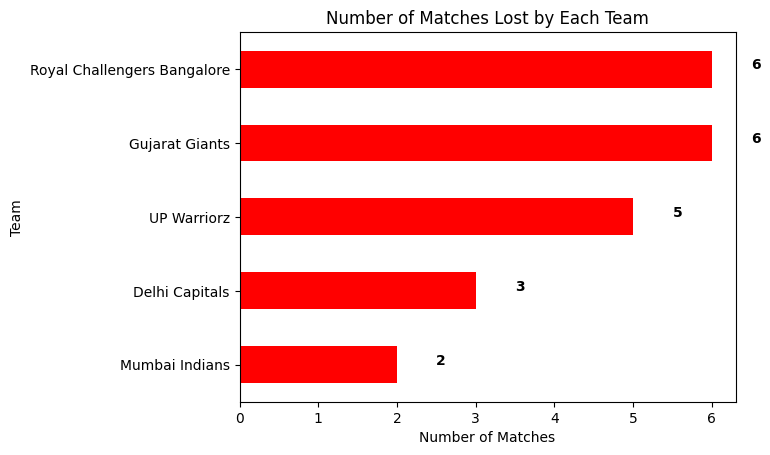

In [14]:
total_matches = pd.concat([match_info_df['Team1'], match_info_df['Team2']]).value_counts()
matches_won = match_info_df['winner'].value_counts()
matches_lost = total_matches - matches_won
ax = matches_lost.plot.barh(color='red')
ax.set_title('Number of Matches Lost by Each Team')
ax.set_xlabel('Number of Matches')
ax.set_ylabel('Team')

for i, v in enumerate(matches_lost):
    ax.text(v + 0.5, i, str(v), color='black', fontweight='bold')
plt.show()

## Calculating the winning percentage for the team that won the toss

In [15]:
# create a new column 'toss_won_and_match_won' to indicate whether the team that won the toss also won the match
match_info_df['toss_won_and_match_won'] = (match_info_df['toss_winner'] == match_info_df['winner'])

# filter the DataFrame to only include the matches where the toss winner and match winner were as specified in the prompt
specified_matches_df = match_info_df[(match_info_df['toss_winner'] == 'Gujarat Giants') & (match_info_df['winner'] == 'Mumbai Indians') |
                                     (match_info_df['toss_winner'] == 'Royal Challengers Bangalore') & (match_info_df['winner'] == 'Delhi Capitals') |
                                     (match_info_df['toss_winner'] == 'Gujarat Giants') & (match_info_df['winner'] == 'UP Warriorz') |
                                     (match_info_df['toss_winner'] == 'Royal Challengers Bangalore') & (match_info_df['winner'] == 'Mumbai Indians') |
                                     (match_info_df['toss_winner'] == 'UP Warriorz') & (match_info_df['winner'] == 'Delhi Capitals') |
                                     (match_info_df['toss_winner'] == 'Gujarat Giants') & (match_info_df['winner'] == 'Gujarat Giants') |
                                     (match_info_df['toss_winner'] == 'Delhi Capitals') & (match_info_df['winner'] == 'Mumbai Indians') |
                                     (match_info_df['toss_winner'] == 'Royal Challengers Bangalore') & (match_info_df['winner'] == 'UP Warriorz') |
                                     (match_info_df['toss_winner'] == 'Gujarat Giants') & (match_info_df['winner'] == 'Delhi Capitals') |
                                     (match_info_df['toss_winner'] == 'UP Warriorz') & (match_info_df['winner'] == 'Mumbai Indians')]

# calculate the winning percentage for the toss winner
winning_percentage = specified_matches_df['toss_won_and_match_won'].sum() / specified_matches_df.shape[0] * 100

# print the winning percentage
print(f"The winning percentage for the toss winner is {winning_percentage:.2f}%")


The winning percentage for the toss winner is 7.14%


## Calculating the winning percentage for each team if they won the TOSS

In [16]:
# Filter the data based on the given toss and winner combinations
toss_winners = ['Gujarat Giants', 'Royal Challengers Bangalore', 'UP Warriorz', 'Delhi Capitals', 'Mumbai Indians']
winners = ['Mumbai Indians', 'Delhi Capitals', 'UP Warriorz', 'Mumbai Indians', 'Delhi Capitals', 'Gujarat Giants', 'Mumbai Indians', 'UP Warriorz', 'Delhi Capitals', 'Mumbai Indians']

# Filter the data based on toss winners and winners
filtered_df = match_info_df[(match_info_df['toss_winner'].isin(toss_winners)) & (match_info_df['winner'].isin(winners))]

# Calculate the number of matches won after winning the toss for each team
matches_won = filtered_df[filtered_df['toss_winner'] == filtered_df['winner']].groupby('toss_winner')['winner'].count()

# Calculate the total number of matches won after winning the toss for each team
total_matches = filtered_df.groupby('toss_winner')['winner'].count()

# Calculate the winning percentage for each team
winning_percentage = matches_won / total_matches * 100

# Print the winning percentage for each team
print(winning_percentage)

toss_winner
Delhi Capitals                  50.000000
Gujarat Giants                  16.666667
Mumbai Indians                 100.000000
Royal Challengers Bangalore           NaN
UP Warriorz                     25.000000
Name: winner, dtype: float64


## Getting the results of all the matches in the WPL by 'Win by Runs' and 'Win by Wickets'

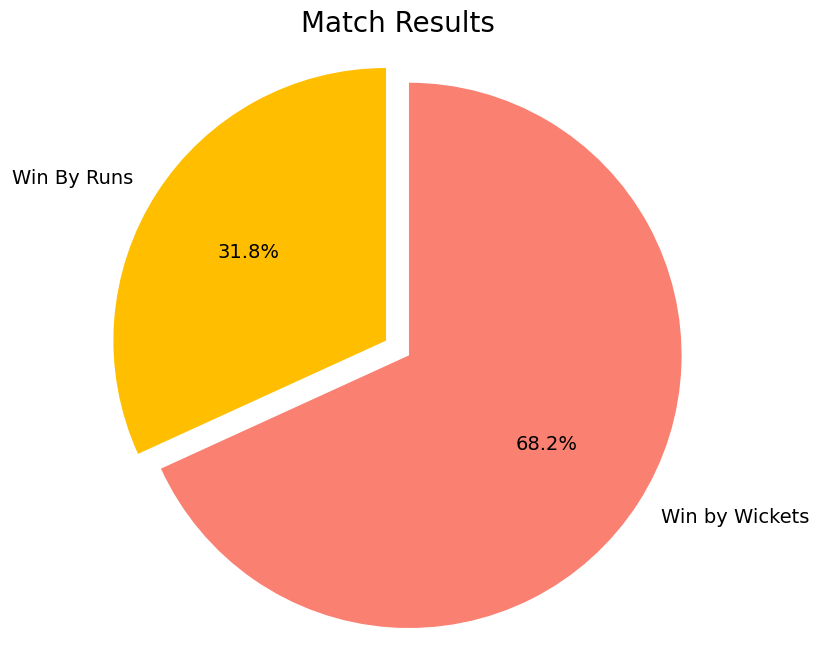

In [17]:
# Filter the data
Win_By_Runs = match_info_df[match_info_df['winner_runs'] > 0]['winner_runs'].count()
Win_By_Wickets = match_info_df[match_info_df['winner_wickets'] > 0]['winner_wickets'].count()

# Create the pie chart
labels = ['Win By Runs', 'Win by Wickets']
sizes = [Win_By_Runs, Win_By_Wickets]
colors = ['#FFBF00', '#FA8072']
explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       startangle=90, textprops={'fontsize': 14})
ax.set_title('Match Results', fontsize=20)
ax.axis('equal')
plt.show()

## Calculating the total runs scored by each team against fours and sixes

In [18]:
# filter the deliveries where runs were scored off the bat
runs_off_bat_df = deliveries_df[deliveries_df['runs_off_bat'] > 0]

# group the data by batting team and count the number of fours and runs by fours for each team
fours_data = runs_off_bat_df[runs_off_bat_df['runs_off_bat'] == 4].groupby('batting_team')['runs_off_bat'].agg([('runs by fours','sum'),('fours','count')])

# group the data by batting team and count the number of sixes and runs by sixes for each team
sixes_data = runs_off_bat_df[runs_off_bat_df['runs_off_bat'] == 6].groupby('batting_team')['runs_off_bat'].agg([('runs by sixes','sum'),('sixes','count')])

# merge fours_data and sixes_data
team_data = pd.concat([fours_data, sixes_data], axis=1).fillna(0)

# calculate total runs
team_data['Total Runs'] = runs_off_bat_df.groupby('batting_team')['runs_off_bat'].sum() + deliveries_df.groupby('batting_team')['extras'].sum()

# create a list of lists with the table data
table_data = [['Team Name', 'Total Runs', 'Fours', 'Runs from Four', 'Sixes', 'Runs from Sixes']]
for team in team_data.index:
    total_runs = team_data.loc[team, 'Total Runs']
    fours = team_data.loc[team, 'fours']
    runs_by_fours = team_data.loc[team, 'runs by fours']
    sixes = team_data.loc[team, 'sixes']
    runs_by_sixes = team_data.loc[team, 'runs by sixes']
    table_data.append([team, total_runs, fours, runs_by_fours, sixes, runs_by_sixes])

# print the table
print(tabulate.tabulate(table_data, headers='firstrow', tablefmt='simple'))

Team Name                      Total Runs    Fours    Runs from Four    Sixes    Runs from Sixes
---------------------------  ------------  -------  ----------------  -------  -----------------
Delhi Capitals                       1319      148               592       43                258
Gujarat Giants                       1159      142               568       24                144
Mumbai Indians                       1482      195               780       27                162
Royal Challengers Bangalore          1246      149               596       36                216
UP Warriorz                          1335      167               668       29                174


## Finding the TOP-10 players who were auctioned for the highest price

In [19]:
selected_columns = auction_df[['Players', 'Sold For']]
sorted_df = selected_columns.sort_values(by='Sold For', ascending=False)
print(sorted_df.head(10))

              Players  Sold For
44    Smriti Mandhana  34000000
42     Natalie Sciver  32000000
43   Ashleigh Gardner  32000000
37      Deepti Sharma  26000000
36  Jemimah Rodrigues  22000000
34      Shafali Verma  20000000
35        Beth Mooney  20000000
12    Pooja Vastrakar  19000000
11        Richa Ghosh  19000000
10   Harmanpreet Kaur  18000000


## Finding the TOP-20 players who were paid more than their base price

Number of times paid over base price: 42

Top 20 players who paid over base price:
              Players  price_ratio
44    Smriti Mandhana         6.80
42     Natalie Sciver         6.40
43   Ashleigh Gardner         6.40
37      Deepti Sharma         5.20
73      Tanuja Kanwer         5.00
35        Beth Mooney         5.00
71       Laura Harris         4.50
36  Jemimah Rodrigues         4.40
34      Shafali Verma         4.00
65    Shweta Sehrawat         4.00
12    Pooja Vastrakar         3.80
11        Richa Ghosh         3.80
7      Yastika Bhatia         3.75
6      Marizanne Kapp         3.75
10   Harmanpreet Kaur         3.60
9   Sophie Ecclestone         3.60
3      Tahila McGrath         3.50
4       Devika Vaidya         3.50
62     Ashwani Kumari         3.50
63       Kanika Ahuja         3.50


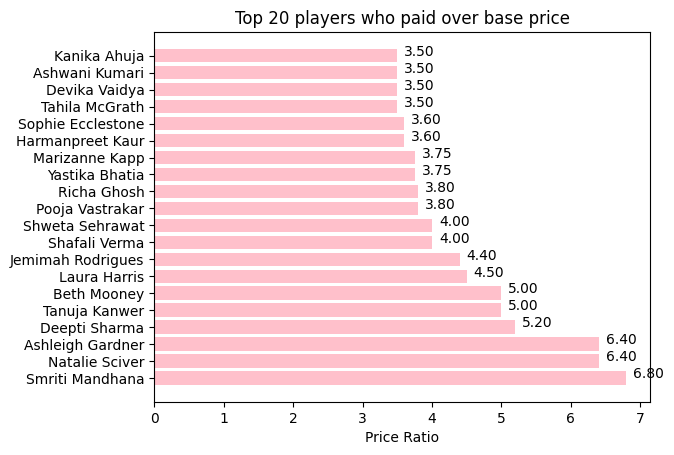

In [20]:
auction_df['price_ratio'] = auction_df['Sold For'] / auction_df['Base Price']
num_times_over_base = (auction_df['price_ratio'] > 1).sum()
print("Number of times paid over base price:", num_times_over_base)
top_players = auction_df[auction_df['price_ratio'] > 1].sort_values('price_ratio', ascending=False).head(20)

print("\nTop 20 players who paid over base price:")
print(top_players[['Players', 'price_ratio']])

#Chart
fig, ax = plt.subplots()
ax.barh(top_players['Players'], top_players['price_ratio'], color='pink')

for i, (player, ratio) in enumerate(zip(top_players['Players'], top_players['price_ratio'])):
    ax.text(ratio + 0.1, i, f"{ratio:.2f}")
ax.set_title("Top 20 players who paid over base price")
ax.set_xlabel("Price Ratio")
plt.show()

## Finding the players who scored the most runs in the WPL

In [22]:
player_runs = deliveries_df.groupby('striker')['runs_off_bat'].sum()
player_runs = player_runs.sort_values(ascending=False)

print("Player\t\tRuns")
print("--------------------")
for player, runs in player_runs.items():
    print(f"{player}\t\t{runs}")
    if runs < player_runs.iloc[9]:
        break

Player		Runs
--------------------
Meg Lanning		345
Natalie Sciver		332
Tahila McGrath		302
Harmanpreet Kaur		281
Hayley Matthews		271
Sophie Devine		266
Alyssa Healy		253
Ellyse Perry		253
Shafali Verma		252
Grace Harris		230
Yastika Bhatia		214


## Finding the players who took the most wickets in the WPL

In [23]:
bowler_groups = deliveries_df.groupby('bowler')

filtered_data = deliveries_df[(deliveries_df['wicket_type'].isin
                               (['bowled', 'caught', 'lbw', 'caught and bowled', 'stumped']))
                              & (deliveries_df['wicket_type'].notnull())
                              & (deliveries_df['wicket_type']
                            != 'retired hurt') & (deliveries_df['wicket_type']
                            != 'run out')]

wickets_data = filtered_data.groupby('bowler')['wicket_type'].count()
sorted_data = wickets_data.sort_values(ascending=False).reset_index(name='Wickets')

print(sorted_data.head(10))

              bowler  Wickets
0  Sophie Ecclestone       16
1    Hayley Matthews       16
2      Isabelle Wong       15
3      Saika Ishaque       15
4        Amelia Kerr       15
5          Kim Garth       11
6      Shikha Pandey       10
7     Natalie Sciver       10
8   Ashleigh Gardner       10
9      Deepti Sharma        9


## Finding the players who were the best all-rounders in the WPL

In [24]:
player_runs = deliveries_df.groupby('striker')['runs_off_bat'].sum()
player_runs = player_runs[player_runs > 150]

bowler_groups = deliveries_df.groupby('bowler')
filtered_data = deliveries_df[(deliveries_df['wicket_type'].isin(['bowled', 'caught', 'lbw', 'caught and bowled', 'stumped']))
                              & (deliveries_df['wicket_type'].notnull())
                              & (deliveries_df['wicket_type'] != 'retired hurt')
                              & (deliveries_df['wicket_type'] != 'run out')]
wickets_data = filtered_data.groupby('bowler')['wicket_type'].count()
wickets_data = wickets_data[wickets_data > 3]

all_rounders = player_runs.index.intersection(wickets_data.index)

print("Player\t\tRuns\tWickets")
print("---------------------------")
for player in all_rounders:
    runs = player_runs[player]
    wickets = wickets_data[player]
    print(f"{player}\t\t{runs}\t{wickets}")

Player		Runs	Wickets
---------------------------
Alice Capsey		159	6
Ashleigh Gardner		204	10
Ellyse Perry		253	4
Hayley Matthews		271	16
Marizanne Kapp		177	9
Natalie Sciver		332	10


## Finding the players who were awarded the Player of the Match award the most times

C:\Users\FAIZAN\AppData\Local\Temp\ipykernel_18064\3403840239.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players, y=top_players.index, orient='h', palette="hsv")


<Figure size 1800x1000 with 0 Axes>

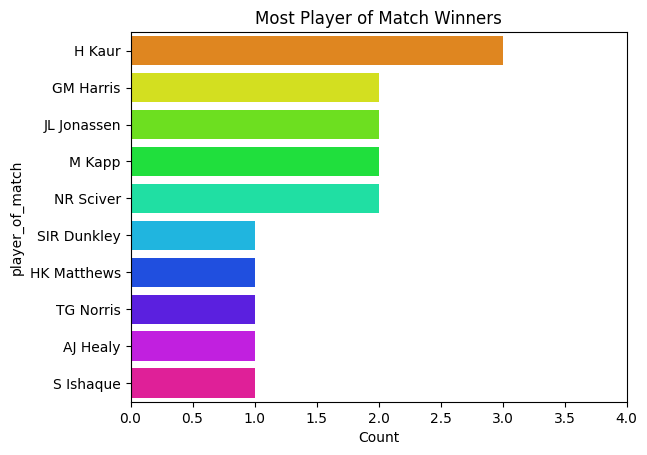

In [25]:
# filter out non-player_of_match values
player_of_match_df = match_info_df[match_info_df['player_of_match'].notnull()]

# count the number of times each player won the player of the match award
top_players = player_of_match_df['player_of_match'].value_counts()[:10]

# plot horizontal bar chart
plt.figure(figsize=(18, 10))
fig, ax = plt.subplots()
ax.set_xlim([0, 4])
ax.set_xlabel("Count")
ax.set_title("Most Player of Match Winners")
sns.barplot(x=top_players, y=top_players.index, orient='h', palette="hsv")
plt.show()

## Calculating the total runs scored by each player against fours and sixes

Player Name            Fours    Sixes
-------------------  -------  -------
1. Meg Lanning            50        6
2. Natalie Sciver         47        6
3. Tahila McGrath         46        7
4. Harmanpreet Kaur       44        3
5. Alyssa Healy           41        3
6. Yastika Bhatia         36        2
7. Hayley Matthews        33       10
8. Sophie Devine          32       13
9. Shafali Verma          32       13
10. Harleen Deol          29        2


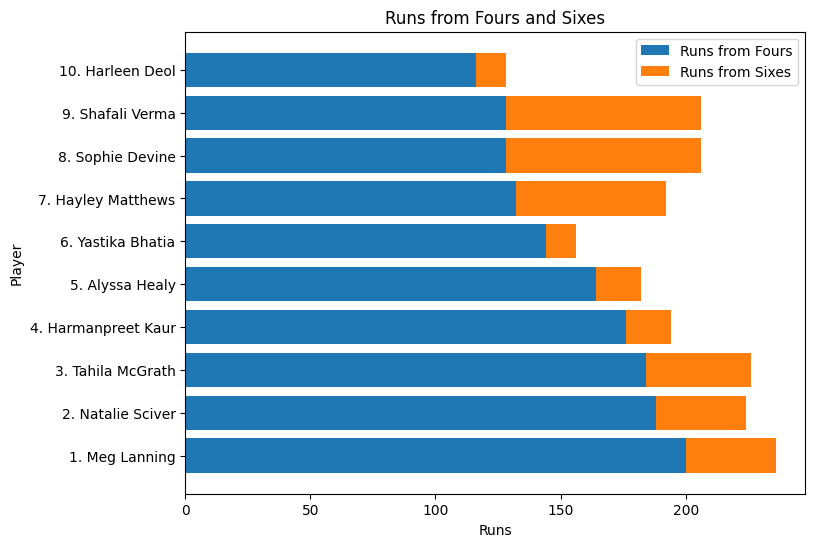

In [26]:
# filter the deliveries where runs were scored off the bat
runs_off_bat_df = deliveries_df[deliveries_df['runs_off_bat'] > 0]

# group the data by striker and count the number of fours and runs by fours for each striker
fours_data = runs_off_bat_df[runs_off_bat_df['runs_off_bat'] == 4].groupby('striker')['runs_off_bat'].agg([('runs by fours','sum'),('fours','count')])

# group the data by striker and count the number of sixes and runs by sixes for each striker
sixes_data = runs_off_bat_df[runs_off_bat_df['runs_off_bat'] == 6].groupby('striker')['runs_off_bat'].agg([('runs by sixes','sum'),('sixes','count')])

# merge fours_data and sixes_data
player_data = pd.concat([fours_data, sixes_data], axis=1).fillna(0)

# sort the players by the number of fours
sorted_data = player_data.sort_values(by='fours', ascending=False)

# create a list of lists with the table data
table_data = [['Player Name', 'Fours', 'Sixes']]
for i, (player, row) in enumerate(sorted_data.head(10).iterrows()):
    fours = row['fours']
    runs_from_fours = fours * 4
    sixes = row['sixes']
    runs_from_sixes = sixes * 6
    table_data.append([f"{i+1}. {player}", fours, sixes])

# print the table
print(tabulate.tabulate(table_data, headers='firstrow', tablefmt='simple'))

# Ploting Chart 
players = [f"{i+1}. {player}" for i, (player, row) in enumerate(sorted_data.head(10).iterrows())]
runs_from_fours = [row['fours']*4 for player, row in sorted_data.head(10).iterrows()]
runs_from_sixes = [row['sixes']*6 for player, row in sorted_data.head(10).iterrows()]

fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(players, runs_from_fours, label='Runs from Fours')
ax.barh(players, runs_from_sixes, left=runs_from_fours, label='Runs from Sixes')

ax.set_xlabel('Runs')
ax.set_ylabel('Player')
ax.set_title('Runs from Fours and Sixes')
ax.legend()

plt.show()


## Finding the costliest player who scored the most runs against their auction price

Top 10 qualified players with the highest runs to cost:
    Player            Team Name                      Auction Price    Runs    Runs to Cost(Rs.)
--  ----------------  ---------------------------  ---------------  ------  -------------------
42  Natalie Sciver    Mumbai Indians                      32000000     332                96386
34  Shafali Verma     Delhi Capitals                      20000000     252                79365
 7  Yastika Bhatia    Mumbai Indians                      15000000     214                70093
 8  Ellyse Perry      Royal Challengers Bangalore         17000000     253                67194
10  Harmanpreet Kaur  Mumbai Indians                      18000000     281                64057
 3  Tahila McGrath    UP Warriorz                         14000000     302                46358
84  Grace Harris      UP Warriorz                          7500000     230                32609
 2  Meg Lanning       Delhi Capitals                      11000000     345      

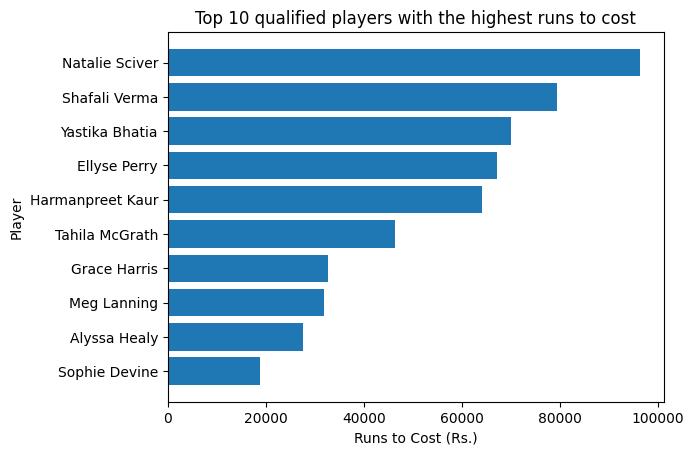

In [28]:
# Group the deliveries data by striker and sum the runs scored by each striker
player_runs = deliveries_df.groupby('striker')['runs_off_bat'].sum()

# Group the deliveries data by striker and count the number of unique match_id for each striker
striker_match_counts = deliveries_df.groupby('striker')['match_id'].nunique()

# Filter the DataFrame to keep only the rows where the count of match_id is greater than or equal to 3
qualified_strikers = striker_match_counts[striker_match_counts >= 3]

# Extract the striker column from the filtered DataFrame as a list of players
qualified_strikers_list = list(qualified_strikers.index)

# Filter the auction data to keep only the qualified strikers
qualified_auction_df = auction_df[auction_df['Players'].isin(qualified_strikers_list)].copy()

# Calculate runs to cost for each player in the qualified auction data
qualified_auction_df['Runs to Cost'] = round (qualified_auction_df['Sold For'] / qualified_auction_df['Players'].map(player_runs))

# Merge the qualified auction data with the player_runs data to get the runs scored by each player
qualified_auction_df = qualified_auction_df.merge(player_runs, left_on='Players', right_index=True)

# Rename the columns in the qualified auction data
qualified_auction_df = qualified_auction_df.rename(columns={'runs_off_bat': 'Runs'})

# Define the list of top 10 runs scorers
top_10_runs_scorer = ['Meg Lanning', 'Natalie Sciver', 'Tahila McGrath', 'Harmanpreet Kaur', 'Hayley Matthews', 'Sophie Devine', 'Ellyse Perry', 'Alyssa Healy', 'Shafali Verma', 'Grace Harris', 'Yastika Bhatia']

# Filter the qualified auction data to keep only the rows where the Player is in the top 10 runs scorers
qualified_auction_df = qualified_auction_df[qualified_auction_df['Players'].isin(top_10_runs_scorer)]

# Sort the qualified auction data by runs to cost in descending order
sorted_auction_df = qualified_auction_df.sort_values(by='Runs to Cost', ascending=False)

# Print the top 10 players with the highest runs to cost
print("Top 10 qualified players with the highest runs to cost:")
print(tabulate.tabulate(sorted_auction_df[['Players', 'Team Name', 'Sold For', 'Runs', 'Runs to Cost']].head(10), headers=['Player', 'Team Name', 'Auction Price', 'Runs', 'Runs to Cost(Rs.)']))

# Plot
plt.barh(sorted_auction_df['Players'].head(10), sorted_auction_df['Runs to Cost'].head(10))
plt.xlabel('Runs to Cost (Rs.)')
plt.ylabel('Player')
plt.title('Top 10 qualified players with the highest runs to cost')
plt.gca().invert_yaxis()
plt.show()

## Finding the top 10 bowlers who had the best wickets to cost ratio

Top 10 Bowlers with the Best Wickets to Cost Ratio:

Player		Auction Price	Wickets	Wickets to Cost
Natalie Sciver		32,000,000.00		10	3200000.00
Ashleigh Gardner		32,000,000.00		10	3200000.00
Marizanne Kapp		15,000,000.00		9	1666666.67
Sophie Ecclestone		18,000,000.00		16	1125000.00
Amelia Kerr		10,000,000.00		15	666666.67
Shikha Pandey		6,000,000.00		10	600000.00
Kim Garth		5,000,000.00		11	454545.45
Hayley Matthews		4,000,000.00		16	250000.00
Isabelle Wong		3,000,000.00		15	200000.00
Saika Ishaque		1,000,000.00		15	66666.67


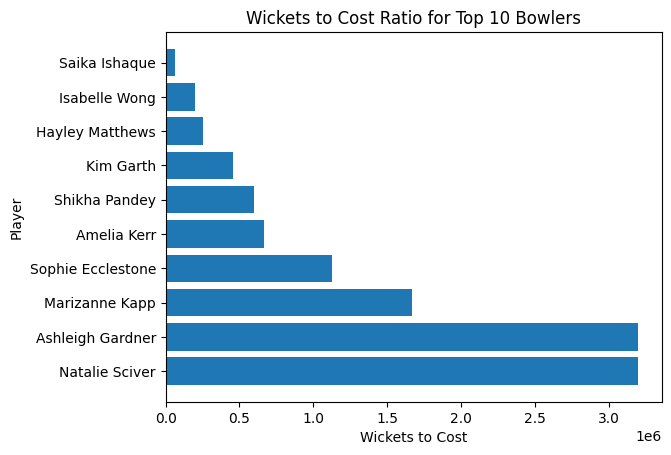

In [29]:
# Define the top 10 bowlers
Top_10_Bowlers = ['Hayley Matthews', 'Sophie Ecclestone', 'Saika Ishaque', 'Amelia Kerr', 'Isabelle Wong', 'Kim Garth', 'Shikha Pandey', 'Ashleigh Gardner', 'Natalie Sciver', 'Marizanne Kapp']

# Get auction price for these players from the auction_df table
players_auction_df = auction_df.loc[auction_df['Players'].isin(Top_10_Bowlers), ['Players', 'Sold For']]
players_auction_df = players_auction_df.reset_index(drop=True)

# Get wickets taken by players
filtered_data = deliveries_df[(deliveries_df['wicket_type'].isin(['bowled', 'caught', 'lbw', 'caught and bowled', 'stumped'])) & (deliveries_df['wicket_type'].notnull()) & (deliveries_df['wicket_type'] != 'retired hurt') & (deliveries_df['wicket_type'] != 'run out')]
wickets_data = filtered_data.groupby('bowler')['wicket_type'].count().reset_index()
wickets_data = wickets_data.rename(columns={'bowler': 'Players', 'wicket_type': 'Wickets'})

# Merge the auction and wickets data
merged_data = pd.merge(players_auction_df, wickets_data, on='Players')

# Calculate the Wickets to Cost ratio and format the auction price
merged_data['Wickets to Cost'] = merged_data['Sold For'] / merged_data['Wickets']
merged_data['Sold For'] = merged_data['Sold For'].apply(lambda x: '{:,.2f}'.format(x).replace('$',''))

# Filter the data to keep only the rows for the top 10 bowlers
merged_data = merged_data.loc[merged_data['Players'].isin(Top_10_Bowlers)]

# Sort the data by the Wickets to Cost ratio in descending order
merged_data = merged_data.sort_values('Wickets to Cost', ascending=False)

# Print the results
print('Top 10 Bowlers with the Best Wickets to Cost Ratio:\n')
print('Player\t\tAuction Price\tWickets\tWickets to Cost')
for index, row in merged_data.sort_values('Wickets to Cost', ascending=False).iterrows():
    print(f"{row['Players']}\t\t{row['Sold For']}\t\t{row['Wickets']}\t{row['Wickets to Cost']:.2f}")

# Plot a horizontal bar chart of the Wickets to Cost ratio
plt.barh(merged_data['Players'], merged_data['Wickets to Cost'])
plt.title('Wickets to Cost Ratio for Top 10 Bowlers')
plt.xlabel('Wickets to Cost')
plt.ylabel('Player')
plt.show()

## Finding the top all-rounders who had the best price per aggregate run
An Aggregate Run = Total Runs / Total Wickets -- in the season

Player              Runs    Wickets    Aggregate Runs    Price Per Aggregate Run
----------------  ------  ---------  ----------------  -------------------------
Ashleigh Gardner     204         10               474                    67510.5
Natalie Sciver       332         10               602                    53156.1
Ellyse Perry         253          4               361                    47091.4
Marizanne Kapp       177          9               420                    35714.3
Alice Capsey         159          6               321                    23364.5
Hayley Matthews      271         16               703                     5689.9


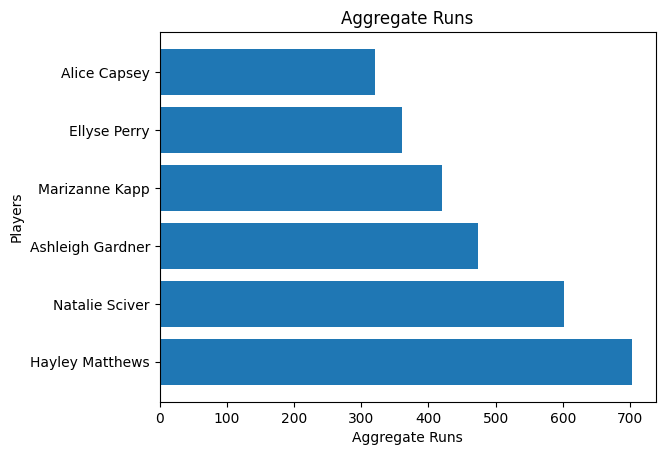

In [30]:
# Calculate the total wickets
filtered_wicket_data = deliveries_df[(deliveries_df['wicket_type'].isin(['bowled', 'caught', 'lbw', 'caught and bowled', 'stumped']))
                                & (deliveries_df['wicket_type'].notnull())
                                & (deliveries_df['wicket_type'] != 'retired hurt')
                                & (deliveries_df['wicket_type'] != 'run out')]
wickets_data = filtered_wicket_data.groupby('bowler')['wicket_type'].count()
total_wickets = wickets_data.sum()

# Calculate the total runs
total_runs = deliveries_df['runs_off_bat'].sum() + deliveries_df['extras'].sum()

# Calculate Avg_Wicket_Per_Run
avg_wicket_per_run = round(total_runs / total_wickets)

# Get data for all-rounders
player_runs = deliveries_df.groupby('striker')['runs_off_bat'].sum()
player_runs = player_runs[player_runs > 150]

bowler_groups = deliveries_df.groupby('bowler')
filtered_data = deliveries_df[(deliveries_df['wicket_type'].isin(['bowled', 'caught', 'lbw', 'caught and bowled', 'stumped']))
                              & (deliveries_df['wicket_type'].notnull())
                              & (deliveries_df['wicket_type'] != 'retired hurt')
                              & (deliveries_df['wicket_type'] != 'run out')]
wickets_data = filtered_data.groupby('bowler')['wicket_type'].count()
wickets_data = wickets_data[wickets_data > 3]

all_rounders = player_runs.index.intersection(wickets_data.index)

table_data = []
for player in all_rounders:
    runs = player_runs[player]
    wickets = wickets_data[player]
    aggregate_runs = (wickets * avg_wicket_per_run) + runs
    auction_price = auction_df[auction_df['Players'] == player]['Sold For'].values[0]
    price_per_aggregate_run = auction_price / aggregate_runs
    table_data.append([player, runs, wickets, aggregate_runs,price_per_aggregate_run])

# Sort the table based on last column
table_data.sort(key=lambda x: x[4], reverse=True)

# Print the output using tabulate
print(tabulate.tabulate(table_data, headers=["Player", "Runs", "Wickets", "Aggregate Runs", "Price Per Aggregate Run"]))

#Chart
table_data.sort(key=lambda x: x[3], reverse=True)

plt.barh(range(len(table_data)), [row[3] for row in table_data])
plt.yticks(range(len(table_data)), [row[0] for row in table_data])
plt.xlabel("Aggregate Runs")
plt.ylabel("Players")
plt.title("Aggregate Runs")
plt.show()

## Finding the number of times each team paid over the base price for a player

In [31]:
# Group auction data by team name
team_data = auction_df.groupby('Team Name')

# Calculate aggregate statistics
team_stats = team_data.agg({'Players': 'count',
                            'Base Price': 'sum',
                            'Sold For': 'sum'})

# Rename Sold For column to Auction Price
team_stats = team_stats.rename(columns={'Sold For': 'Auction Price'})

# Calculate Times Paid on Base Price
team_stats['Times Paid on Base Price'] = team_stats['Auction Price'] / team_stats['Base Price']

# Print final table
print(team_stats[['Players', 'Base Price', 'Auction Price', 'Times Paid on Base Price']])

                             Players  Base Price  Auction Price  \
Team Name                                                         
Delhi Capitals                    18    54000000      116500000   
Gujarat Giants                    20    58000000      127500000   
Mumbai Indians                    17    47000000      120000000   
Royal Challengers Bangalore       18    50000000      119000000   
UP Warriorz                       18    52000000      126500000   

                             Times Paid on Base Price  
Team Name                                              
Delhi Capitals                               2.157407  
Gujarat Giants                               2.198276  
Mumbai Indians                               2.553191  
Royal Challengers Bangalore                  2.380000  
UP Warriorz                                  2.432692  
